# Perceptron Algorithm for Data with d=2 Features

In this notebook, we consider a binary classification problem with outputs $y=+1$ or $y=-1$. We consider data with
$d=2$ features. We generate our own target function and then use the Perceptron algorithm to try to learn the target function from the training data. We study this problem for $N=10$ training examples and for $N=100$ training examples. The function learned by the Perceptron algorithm is much closer to the target function for $N=100$ training examples. We also explore the average number of iterations it takes the Perceptron algorithm to converge for $N=10$ training examples and for $N=100$ training examples.

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Setting numpy seed to reproduce results.

In [2]:
np.random.seed(0)

## Decision Boundary of Target Function

We are condering binary classification for this problem with outputs $y = +1$ or $y = -1$. The input values (data)
are $\textbf{x} = (x_{1}, x_{2}, x_{3}, ..., x_{d})$. The hypothesis $h( \textbf{x} )$ we are considering is the following: if the dot product of the weights of the hypothesis $\textbf{w} = (w_{0}, w_{1}, w_{2}, ..., w_{d})$ and the input values is positive, decide $y = +1$ for the output. Otherwise, decide $y = -1$ for the output. 

$$ h( \textbf{x} ) = \mbox{sign} \left( \sum_{i=0}^{d} w_{i} x_{i} \right) $$


We will consider the $d=2$ scenario for this problem. In this notation, $x_{0}$ is defined as $x_{0} = 1$ to have the notation be more compact. We set this expression equal to 0 since we are interested in finding the decision boundary between $y = +1$ and $y = -1$.

$$ h( \textbf{x} ) = \sum_{i=0}^{2} w_{i} x_{i} = w_{0} + w_{1} x_{1} + w_{2} x_{2} = 0 $$


Rearranging this expression, we find the result below. For this expression, we only have 2 weights $w_{1}$ and $w_{2}$
and the right hand side of the equation is equal to -1. This -1 on the right-hand side serves as a threshold.
If $w_{1} x_{1} + w_{2} x_{2} > -1$, we classify as $y=+1$. Otherwise, we classify as $y = -1$.

$$ \frac{w_{1}}{w_{0}} x_{1} + \frac{w_{2}}{w_{0}} x_{2}  = -1 \rightarrow 
 w_{1} x_{1} + w_{2} x_{2} = -1 $$

## Functions to determine Target Function

The function below has no input. This function draws 2 random points in the $xy$ plane. The decision boundary for the target function is taken to be the line that passes through these two points. The weights of the decision boundary are then determined from the two points passing through the line. 

In [3]:
def target_func_weights():
    
    # First, drawing 2 random points in the 2D plane
    x_1_pts = np.random.uniform(low=-1.0, high=1.0, size=2)
    x_2_pts = np.random.uniform(low=-1.0, high=1.0, size=2)
    
    # We now need to use the two points to solve for w_{1} and $w_{2}$
    # for the decision boundary expression w_{1} x_{1} + w_{2} x_{2} = -1 .
    w1 =  ( x_2_pts[1] - x_2_pts[0] )/( x_1_pts[1]*x_2_pts[0] - x_1_pts[0]*x_2_pts[1] ) 
    w2 =  ( x_1_pts[0] - x_1_pts[1] )/( x_1_pts[1]*x_2_pts[0] - x_1_pts[0]*x_2_pts[1] )
    
    # Returning the weight vector
    return np.array( [w1,w2] )    

This function takes as input the weights. These weights are then used to determine the line passing through the decision boundary. The x_1 values are also entered as input since x_1 is the independent variable.  

In [4]:
def weights_to_slope_int(w_array, x_1_array):
    
    x_2_array = -(w_array[0]/w_array[1])*x_1_array - (1.0/w_array[1])
    
    return x_2_array

## Function to classify the data points as $y = +1 $ or $y = -1$

This function takes as input the data as a matrix and the weights of the decision boundary we want to learn. This function then determines if the data point is above or below the decision boundary. Lastly, this function returns a list for the classification of the data points as either $+1$ or $-1$.

In [5]:
def classify_points( X_data_matrix , weight_vals ):
        
        # Initializing the array that will return the classification of the data as an array of 0s.
        classify_lst = np.zeros( X_data_matrix.shape[1] , dtype = int )
        
        # Computing w1*x1 + w2*x2 for each training example
        output_vals = np.dot( weight_vals, X_data_matrix  )
        
        # Classifing the points with a dot product below the threshold of -1 as -1
        classify_lst[ output_vals < -1.0 ] = -1
        
        # Classifing the points with a dot product above the threshold of -1 as +1
        classify_lst[ output_vals >= -1.0 ] = +1
        
        return classify_lst

## Function to learn the weights with the Perceptron Algorithm

This function take as input the data for the training examples as a matrix, the initial weights for $g$, the function we are learning with the perceptron algorithm, and the correct labels for all the training examples, as determined by the target function $f$. This function returns the weights learned by the perceptron algorithm for $g$ and the number of iterations the perceptron algorithm took to converge. 

In [6]:
def perceptron_ws_N_inter( X_data_matrix, ws_g, data_labels ):
    
    # Initialize the converged condition to False
    converged = False
    
    # Initialize the number of iterations counter to 0
    N_inter = 0
    
    # Apply the perceptron algorithm until all the points are correctly classificed
    while not converged:
        
        # Classifing the points with the weights we have so far for g
        g_learn_labels = classify_points( X_data_matrix , ws_g )
        
        # Determine an array with indicies where the labels determined by
        # the g (the function we are learning) do not agree with the target function f
        index_missclasify = np.where( g_learn_labels != data_labels )[0]
        
        # Finding the length of this list to determine the number of misclassified points
        N_missclasify = len(index_missclasify)
        
        # If there are no misclassified points, the Perceptron algorithm has converged.
        if N_missclasify==0:
            converged = True
        
        # Otherwise
        else:
            
            # Add 1 to the interation counter
            N_inter += 1
            
            # Pick a random data point from the misclassified points
            index_update = np.random.choice( index_missclasify )
            
            # Use this data point to update the weights of the perceptron
            # The weight update is such that the weights should now closer to
            # corrently classify the point we are considering. The weights
            # are updated with the formuta w = w + y_n*x_n, where n is the
            # index of the misclassified data point we are considering.
            ws_g += (float(data_labels[index_update]))*X_data_matrix[:,index_update]
    
    # Returning the weights learned with the perceptron algorithm and the 
    # number of iterations the perceptron algorithm took to converge
    return ( ws_g, N_inter )

## Perceptron Algorithm for $N = 10$ Training Examples

Drawing the weights for the target function $f$

In [7]:
ws_f_target = target_func_weights()

Generating the $N=10$ training examples

In [8]:
N_points = 10
x_1_dataset = np.random.uniform(low=-1.0, high=1.0, size=N_points)
x_2_dataset = np.random.uniform(low=-1.0, high=1.0, size=N_points)

Converting the data to a matrix to make it easier to classify the points and apply the Perceptron algorithm to the data.

In [9]:
X_data = np.array( [ x_1_dataset, x_2_dataset ] )

Applying the classification function with the weights of the target function to classify the points. 

In [10]:
target_labels = classify_points( X_data , ws_f_target )

Finding the line that goes through weights of the target function $f$

In [11]:
x1_vals = np.arange(-1.0,1.0+0.01,0.01)
x2_db_f_targ = weights_to_slope_int( ws_f_target, x1_vals )

Plotting the decision boundary for $f$ and the classification of the training examples

(-1.0, 1.0)

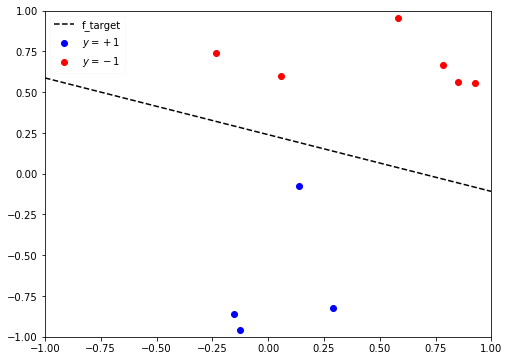

In [12]:
plt.figure(figsize=(8,6))
plt.scatter( x_1_dataset[target_labels==1] , x_2_dataset[target_labels==1] , color="blue", label = r"$y=+1$" )
plt.scatter( x_1_dataset[target_labels==-1] , x_2_dataset[target_labels==-1] , color="red", label = r"$y=-1$" )
plt.plot( x1_vals , x2_db_f_targ , color="black", label = "f_target", linestyle = "--")
plt.legend(loc="best", framealpha = 0.1 )
plt.xlim((-1.0,1.0))
plt.ylim((-1.0,1.0))

Initializing the weights we will learn with the perceptron algorithm to 0s

In [13]:
ws_g_learn = np.array( [0.0, 0.0] )

Applying the Perceptron Algorithm to Learn the weights and find the Iterations it took the Perceptron algorithm to converge.

In [14]:
ws_g_learn, N_interations = perceptron_ws_N_inter( X_data, ws_g_learn , target_labels )
print(ws_g_learn)
print(N_interations)

[-0.89912568 -1.86187395]
3


Finding the line that goes through the weights of the function we learned from the Perceptron, $g$

In [15]:
x2_db_g_learn = weights_to_slope_int( ws_g_learn, x1_vals )

Comparing the decision boundary of the target function to the decision boundary learned by the perceptron algorithm.

(-1.0, 1.0)

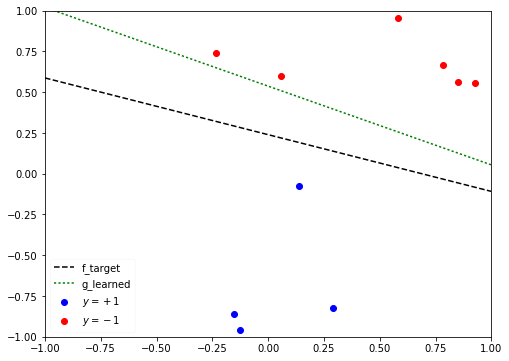

In [16]:
plt.figure(figsize=(8,6))
plt.scatter( x_1_dataset[target_labels==1] , x_2_dataset[target_labels==1] , color="blue", label = r"$y=+1$" )
plt.scatter( x_1_dataset[target_labels==-1] , x_2_dataset[target_labels==-1] , color="red", label = r"$y=-1$" )
plt.plot( x1_vals , x2_db_f_targ , color="black", label = "f_target", linestyle = "--")
plt.plot( x1_vals , x2_db_g_learn , color="green", label = "g_learned", linestyle = ":")
plt.legend(loc="best", framealpha = 0.1 )
plt.xlim((-1.0,1.0))
plt.ylim((-1.0,1.0))

## Perceptron Algorithm for $N = 100$ Training Examples

Drawing the weights for the target function $f$

In [17]:
ws_f_target = target_func_weights()

Generating the $N=100$ training examples

In [18]:
N_points = 100
x_1_dataset = np.random.uniform(low=-1.0, high=1.0, size=N_points)
x_2_dataset = np.random.uniform(low=-1.0, high=1.0, size=N_points)

Converting the data to a matrix to make it easier to classify the points and apply the Perceptron algorithm on the data.

In [19]:
X_data = np.array( [ x_1_dataset, x_2_dataset ] )

Applying the classification function with the weights of the target function to classify the points. 

In [20]:
target_labels = classify_points( X_data , ws_f_target )

Finding the line that goes through weights of the target function $f$

In [21]:
x1_vals = np.arange(-1.0,1.0+0.01,0.01)
x2_db_f_targ = weights_to_slope_int( ws_f_target, x1_vals )

Plotting the decision boundary for $f$ and the classification of the training examples

(-1.0, 1.0)

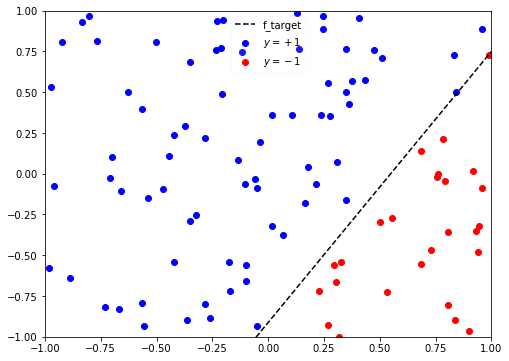

In [22]:
plt.figure(figsize=(8,6))
plt.scatter( x_1_dataset[target_labels==1] , x_2_dataset[target_labels==1] , color="blue", label = r"$y=+1$" )
plt.scatter( x_1_dataset[target_labels==-1] , x_2_dataset[target_labels==-1] , color="red", label = r"$y=-1$" )
plt.plot( x1_vals , x2_db_f_targ , color="black", label = "f_target", linestyle = "--")
plt.legend(loc="best", framealpha = 0.1 )
plt.xlim((-1.0,1.0))
plt.ylim((-1.0,1.0))

Initializing the weights we will learn with the perceptron algorithm to 0s

In [23]:
ws_g_learn = np.array( [0.0, 0.0] )

Applying the Perceptron Algorithm to Learn the weights and find the Iterations it took the Perceptron algorithm to converge.

In [24]:
ws_g_learn, N_interations = perceptron_ws_N_inter( X_data, ws_g_learn , target_labels )
print(ws_g_learn)
print(N_interations)

[-1.80664472  1.04520537]
267


Finding the line that goes through the weights of the function we learned from the Perceptron, $g$

In [25]:
x2_db_g_learn = weights_to_slope_int( ws_g_learn, x1_vals )

Comparing the decision boundary of the target function to the decision boundary learned by the perceptron algorithm.

(-1.0, 1.0)

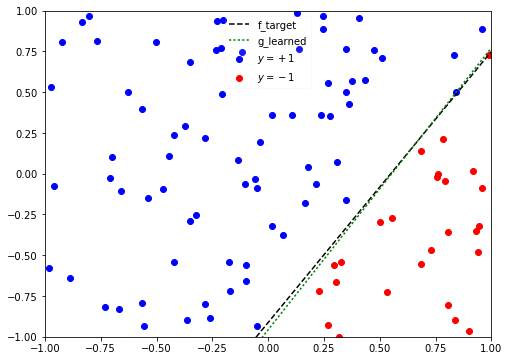

In [26]:
plt.figure(figsize=(8,6))
plt.scatter( x_1_dataset[target_labels==1] , x_2_dataset[target_labels==1] , color="blue", label = r"$y=+1$" )
plt.scatter( x_1_dataset[target_labels==-1] , x_2_dataset[target_labels==-1] , color="red", label = r"$y=-1$" )
plt.plot( x1_vals , x2_db_f_targ , color="black", label = "f_target", linestyle = "--")
plt.plot( x1_vals , x2_db_g_learn , color="green", label = "g_learned", linestyle = ":")
plt.legend(loc="best", framealpha = 0.1 )
plt.xlim((-1.0,1.0))
plt.ylim((-1.0,1.0))

## Performing 1000 simulations with $N=10$ training examples to determine the expected iterations for convergence

Initializing N_points, the number of datapoints for each simulation, N_sims, the number of simulations we will perform, and N_iter_array, the array that will hold the iterations for each simulation.

In [27]:
N_points = 10
N_sims = 1000
N_iter_array = np.zeros( N_sims , dtype = np.double)

Performing the simulations and storing the number of iterations for convergence for each simulation.

In [28]:
for i in range(N_sims):
    
    # Drawing the weights for the target function f
    ws_f_target = target_func_weights()
    
    # Generating the training examples
    x_1_dataset = np.random.uniform(low=-1.0, high=1.0, size=N_points)
    x_2_dataset = np.random.uniform(low=-1.0, high=1.0, size=N_points)
    
    # Putting the training data in a matrix
    X_data = np.array( [ x_1_dataset, x_2_dataset ] )
    
    # Classify the training examples with the weights from the target function f
    target_labels = classify_points( X_data , ws_f_target )
    
    # Initializing the weights of the function we will learn with the Perceptron Algorithm to 0
    ws_g_learn = np.array( [0.0, 0.0] )
    
    # Finding the numbner of iterations it took the Perceptron Algorithm to converge.
    N_iter_array[i] = float( perceptron_ws_N_inter( X_data, ws_g_learn , target_labels )[1] )

Making a histogram of the data. First defining the bins for the histogram and then plotting the data.

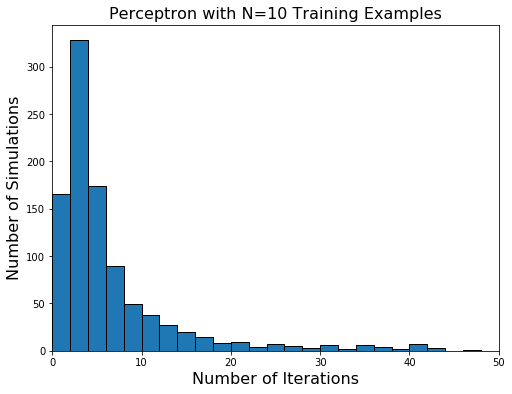

In [29]:
bin_edges = np.arange(0.0,200.0+2.0,2.0)
bin_mid_pts = bin_edges[:-1]

plt.figure(figsize=(8,6))
plt.hist(N_iter_array, bins = bin_edges, edgecolor="black" )
plt.xlim((0.0,50.0))
plt.xlabel("Number of Iterations", fontsize = 16)
plt.ylabel("Number of Simulations", fontsize = 16 )
plt.title("Perceptron with N=10 Training Examples", fontsize = 16 )

In [30]:
print( "Mean Number of Interations: %.1f" %( np.mean(N_iter_array) ) ) 

Mean Number of Interations: 10.5


## Performing 1000 simulations with $N=100$ training examples to determine the expected iterations for convergence

Initializing N_points, the number of datapoints for each simulation, N_sims, the number of simulations we will perform, and N_iter_array, the array that will hold the iterations for each simulation.

In [31]:
N_points = 100
N_sims = 1000
N_iter_array = np.zeros( N_sims , dtype = np.double)

Performing the simulations and storing the number of iterations for convergence for each simulation.

In [32]:
for i in range(N_sims):
    
    # Drawing the weights for the target function f
    ws_f_target = target_func_weights()
    
    # Generating the training examples
    x_1_dataset = np.random.uniform(low=-1.0, high=1.0, size=N_points)
    x_2_dataset = np.random.uniform(low=-1.0, high=1.0, size=N_points)
    
    # Putting the training data in a matrix
    X_data = np.array( [ x_1_dataset, x_2_dataset ] )
    
    # Classify the training examples with the weights from the target function f
    target_labels = classify_points( X_data , ws_f_target )
    
    # Initializing the weights of the function we will learn with the Perceptron Algorithm to 0
    ws_g_learn = np.array( [0.0, 0.0] )
    
    # Finding the numbner of iterations it took the Perceptron Algorithm to converge.
    N_iter_array[i] = float( perceptron_ws_N_inter( X_data, ws_g_learn , target_labels )[1] )

Making a histogram of the data. First defining the bins for the histogram and then plotting the data.

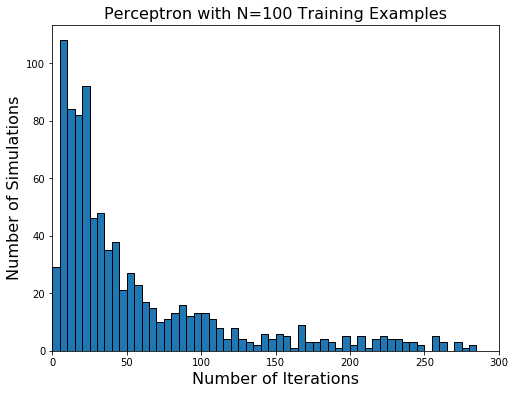

In [33]:
bin_edges = np.arange(0.0,500.0+5.0,5.0)
bin_mid_pts = bin_edges[:-1]

plt.figure(figsize=(8,6))
plt.hist(N_iter_array, bins = bin_edges, edgecolor="black" )
plt.xlim((0.0,300.0))
plt.xlabel("Number of Iterations", fontsize = 16)
plt.ylabel("Number of Simulations", fontsize = 16 )
plt.title("Perceptron with N=100 Training Examples", fontsize = 16 )

In [34]:
print( "Mean Number of Interations: %.1f" %( np.mean(N_iter_array) ) ) 

Mean Number of Interations: 195.6
